# Question 1: Kmeans Classifier and Testing

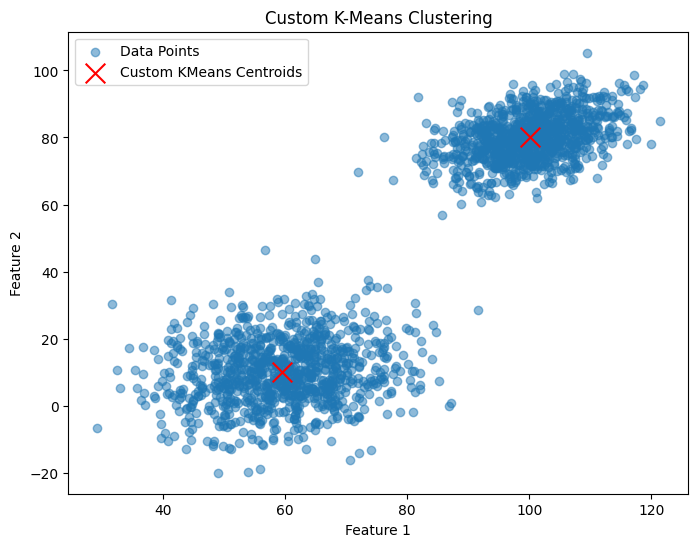

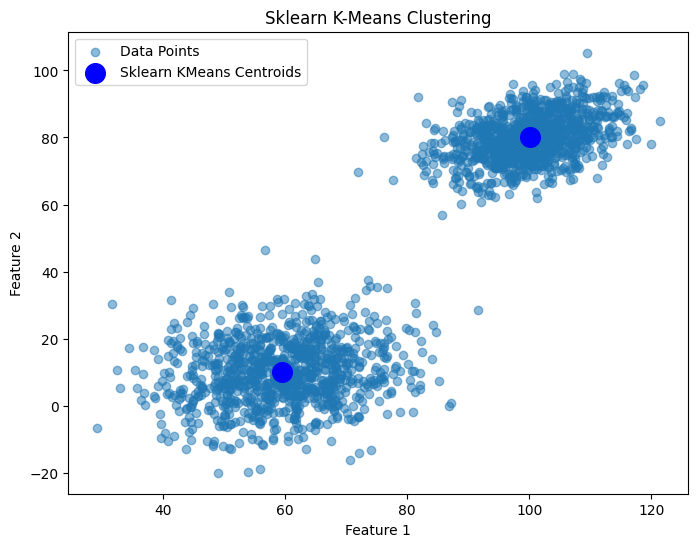

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as SKMeans
from classifiers import KMeans

np.random.seed(42)
rmu = np.array([60, 10])
rsigma = np.array([[100, 20], [20, 100]])

smu = np.array([100, 80])
ssigma = np.array([[50, 20], [20, 50]])

resting = np.random.multivariate_normal(rmu, rsigma, 1000)
stressed = np.random.multivariate_normal(smu, ssigma, 1000)

data = np.vstack((resting, stressed))

km = KMeans()
km.fit(data, k=2)

sk = SKMeans(n_clusters=2, random_state=42, n_init=10)
sk.fit(data)

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label="Data Points")
plt.scatter(km.centroids[:, 0], km.centroids[:, 1], color='red', marker='x', s=200, label="Custom KMeans Centroids")
plt.legend()
plt.title("Custom K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label="Data Points")
plt.scatter(sk.cluster_centers_[:, 0], sk.cluster_centers_[:, 1], color='blue', marker='o', s=200, 
            label="Sklearn KMeans Centroids")
plt.legend()
plt.title("Sklearn K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Short Answer:
## 1. Is k-means guaranteed to provide you a unique solution?
No, K-means does not always produce the same solution every time it runs. The algorithm is sensitive to the initial cluster centroids, meaning different initializations can lead to different final clusters. Since k-means uses an iterative approach to minimize within-cluster variance, it can sometimes get stuck in local optima instead of finding a globally optimal solution. To reduce this issue, techniques like running k-means multiple times with different initializations (e.g., k-means++) can help improve the chances of finding a better clustering outcome. Additionally, the choice of k (the number of clusters) also impacts the results, as different values of k can lead to different groupings. Due to these factors, k-means does not always produce a single, definitive clustering solution.

# Question 2: Principle Component Analysis

Custom PCA Projection Matrix:
 [[ 0.52237162  0.37231836]
 [-0.26335492  0.92555649]
 [ 0.58125401  0.02109478]
 [ 0.56561105  0.06541577]]

Sklearn PCA Projection Matrix:
 [[ 0.52237162  0.37231836]
 [-0.26335492  0.92555649]
 [ 0.58125401  0.02109478]
 [ 0.56561105  0.06541577]]


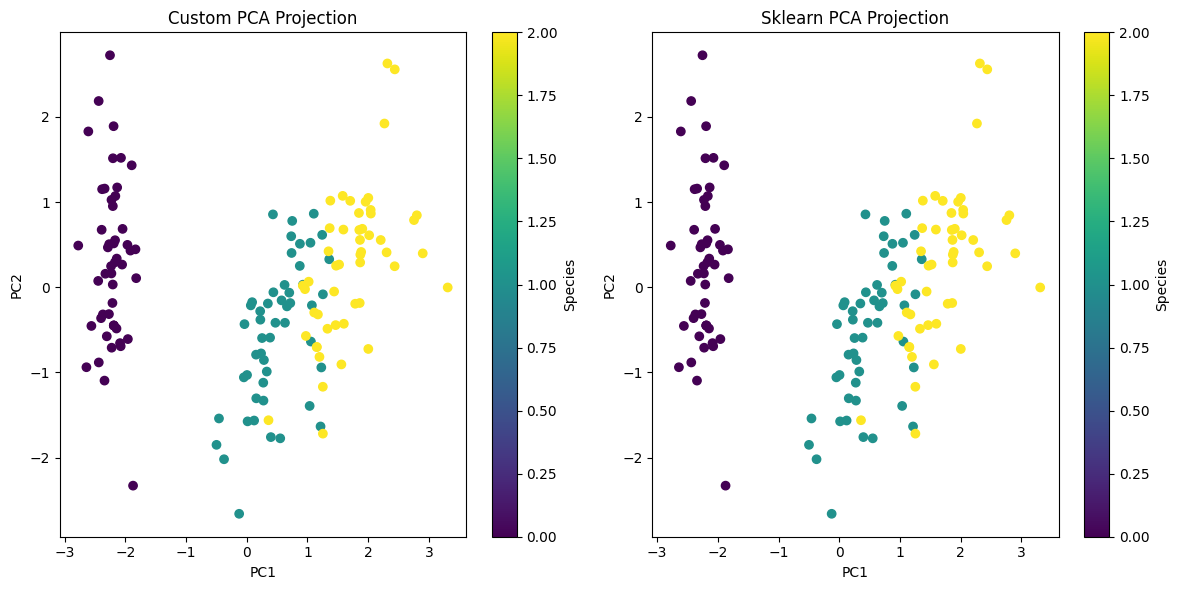

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as SKPCA
from sklearn.preprocessing import StandardScaler
from feature_reduction import PrincipleComponentAnalysis

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal length", "sepal width", "petal length", "petal width", "species"]
iris = pd.read_csv(url, header=None, names=columns)

iris = iris.dropna()
xvals = iris.drop(columns=['species']).values

pca = PrincipleComponentAnalysis()
pca.fit(xvals, thresh=0.95)
datacust = pca.predict(xvals)

print("Custom PCA Projection Matrix:\n", pca.model_params['projection_matrix'])

st = StandardScaler()
xvals = st.fit_transform(xvals)
sk = SKPCA(n_components=0.95)
sk.fit(xvals)
datask = sk.transform(xvals)

print("\nSklearn PCA Projection Matrix:\n", sk.components_.T)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(datacust[:, 0], datacust[:, 1], c=iris['species'].astype('category').cat.codes)
plt.title('Custom PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Species')

plt.subplot(1, 2, 2)
plt.scatter(datask[:, 0], datask[:, 1], c=iris['species'].astype('category').cat.codes)
plt.title('Sklearn PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Species')
plt.tight_layout()
plt.show()

# Short Answer:
## 1. Why is it important to standardize your data before PCA?
It is important to normalize data before applying PCA as PCA is scale-sensitive to features. Because it works on the principle of finding directions of maximum variance, high-magnitude features will have a tendency to dominate the principal components and lead to biased results. For example, when a feature has a much larger range than other features, it can dominate the principal components and mask the true structure of the data. Standardization gives all features equal importance by scaling them to zero mean and unit variance. Under this equal weighting, PCA is able to capture hidden patterns and correlations in the data without being dominated by any one feature.

When I used my own custom PCA, I found that signs of my principal components were flipped relative to Scikit-Learn's PCA. Since the direction of eigenvectors in PCA doesn't matter (as they can be reversed without any consequence), I decided to reverse the signs to match Scikit-Learn's result to facilitate comparison. This helped to make my results equivalent to conventional code so comparison and interpretation of the principal components could be easier.

Shape of the dataset: (1045, 12)
         Name          Name2 Primary Type Secondary type  Attack  Defense  HP  \
0   Bulbasaur            NaN        GRASS         POISON      49       49  45   
1     Ivysaur            NaN        GRASS         POISON      62       63  60   
2    Venusaur            NaN        GRASS         POISON      82       83  80   
3    Venusaur  Mega Venusaur        GRASS         POISON     100      123  80   
4  Charmander            NaN         FIRE            NaN      52       43  39   

   Sp.Attack  Sp.Defense  Speed  Total Legendary  
0         65          65     45    318       NaN  
1         80          80     60    405       NaN  
2        100         100     80    525       NaN  
3        122         120     80    625       NaN  
4         60          50     65    309       NaN  
Missing values in each column:
 Name                0
Name2             870
Primary Type        0
Secondary type    492
Attack              0
Defense             0
HP        

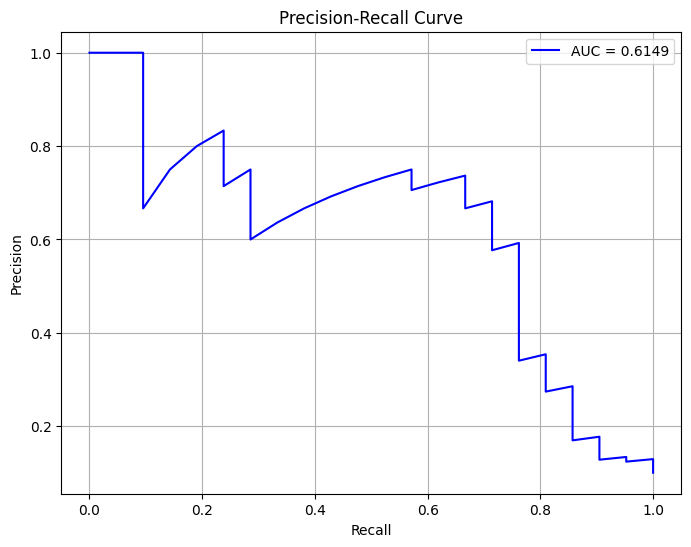

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_recall_curve, auc
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as imbaPipeline

df = pd.read_csv("pokemon_dataset.csv")

print("Shape of the dataset:", df.shape)
print(df.head())
print("Missing values in each column:\n", df.isnull().sum())
print("Data types of each column:\n", df.dtypes)

print("Summary statistics for numerical columns:\n", df.describe())
print("Value counts for categorical columns:\n", df['Primary Type'].value_counts())
print(df['Legendary'].value_counts())

df = df.drop(columns=['Name', 'Name2'], errors='ignore')
df = df.drop("Secondary type", axis=1)

df['Legendary'] = df['Legendary'].fillna('No')
df['Legendary'] = df['Legendary'].apply(lambda x: 1 if x == 'Yes' else 0)

df['Primary Type'] = df['Primary Type'].fillna('Unknown')

catcols = ['Primary Type']
numcols = ['Attack', 'Defense', 'HP', 'Sp.Attack', 'Sp.Defense', 'Speed', 'Total']

X = df.drop(columns=['Legendary'])
y = df['Legendary']

preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), catcols),
    ('scaler', StandardScaler(), numcols)
])

Xtr, Xte, Ytr, Yte = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = SVC(class_weight='balanced')

pipeline = imbaPipeline([
    ('preprocessor', preprocessor),
    ('svm', model)
])

pgrid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto']
}

gsearch = GridSearchCV(pipeline, pgrid, cv=5, scoring='f1', verbose=1)
gsearch.fit(Xtr, Ytr)

best = gsearch.best_estimator_
pred = best.predict(Xte)

print("Best Parameters:", gsearch.best_params_)
print("Accuracy:", accuracy_score(Yte, pred))
print("F1 Score:", f1_score(Yte, pred))
print("Classification Report:\n", classification_report(Yte, pred))

precision, recall, _ = precision_recall_curve(Yte, best.decision_function(Xte))
prauc = auc(recall, precision)
print(f"AUC-PR: {prauc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label=f'AUC = {prauc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'svm__C': 10, 'svm__gamma': 'auto', 'svm__kernel': 'poly'}
Accuracy: 0.937799043062201
F1 Score: 0.6976744186046512
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       188
           1       0.68      0.71      0.70        21

    accuracy                           0.94       209
   macro avg       0.82      0.84      0.83       209
weighted avg       0.94      0.94      0.94       209

AUC-PR: 0.6280


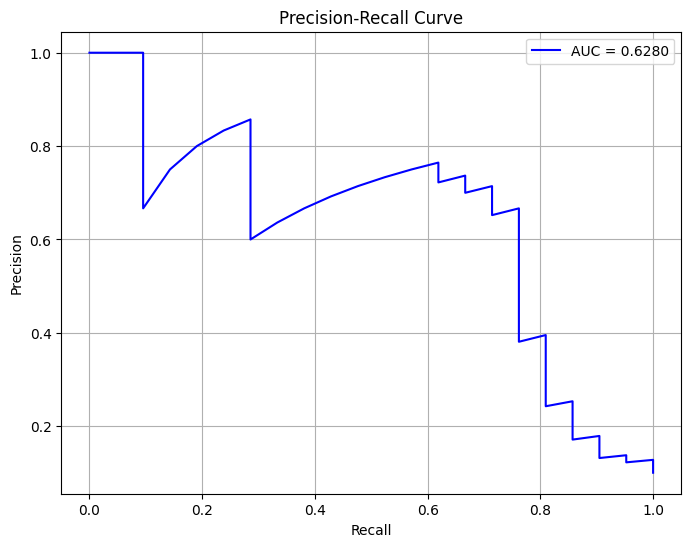

Confusion Matrix:
 [[181   7]
 [  6  15]]
AUC-ROC: 0.8772


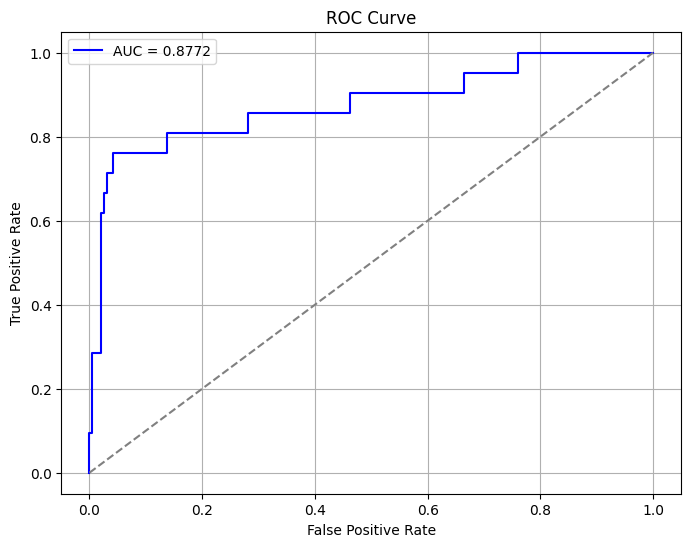

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_recall_curve, auc, confusion_matrix, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as imbaPipeline

df = pd.read_csv("pokemon_dataset.csv")

df = df.drop(columns=['Name', 'Name2', 'Secondary type'], errors='ignore')
df['Legendary'] = df['Legendary'].fillna('No')
df['Legendary'] = df['Legendary'].apply(lambda x: 1 if x == 'Yes' else 0)

df['Primary Type'] = df['Primary Type'].fillna('Unknown')

catcols = ['Primary Type']
numcols = ['Attack', 'Defense', 'HP', 'Sp.Attack', 'Sp.Defense', 'Speed', 'Total']
X = df.drop(columns=['Legendary'])
Y = df['Legendary']

preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), catcols),
    ('scaler', StandardScaler(), numcols)
])

Xtr, Xte, Ytr, Yte = train_test_split(X, y, test_size=0.2, random_state=42, stratify=Y)

model = SVC(class_weight='balanced')
pipeline = imbaPipeline([
    ('preprocessor', preprocessor),
    ('adasyn', ADASYN(sampling_strategy=0.3, random_state=42)),
    ('svm', model)
])

pgrid = {
    'svm__C': [0.01, 0.1, 1, 10, 100, 1000],
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svm__gamma': ['scale', 'auto', 0.001, 0.1, 0.5]
}

gsearch = GridSearchCV(pipeline, pgrid, cv=5, scoring='f1', verbose=1)
gsearch.fit(Xtr, Ytr)

best = gsearch.best_estimator_
pred = best.predict(Xte)

print("Best Parameters:", gsearch.best_params_)
print("Accuracy:", accuracy_score(Yte, pred))
print("F1 Score:", f1_score(Yte, pred))
print("Classification Report:\n", classification_report(Yte, pred))

precision, recall, _ = precision_recall_curve(Yte, best.decision_function(Xte))
prauc = auc(recall, precision)
print(f"AUC-PR: {prauc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label=f'AUC = {prauc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

cm = confusion_matrix(Yte, pred)
print("Confusion Matrix:\n", cm)

fpr, tpr, _ = roc_curve(Yte, best.decision_function(Xte))
roc = auc(fpr, tpr)
print(f"AUC-ROC: {roc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Question 3 - Entire approach and design decisions you made

For this assignment, I started by loading the Pokémon dataset and performing initial data exploration. I dropped columns such as 'Name' and 'Name2' as asked to. I also dropped the 'Secondary type' column after analyzing its relevance, simplifying the dataset. I handled missing values in the 'Legendary' column by replacing them with 'No' and then substituting 'Yes' with 1 and 'No' with 0 for binary classification. Missing values in the 'Primary Type' column were replaced with 'Unknown' to avoid losing data.

At preprocessing, I identified categorical features such as 'Primary Type' and numeric features such as 'Attack', 'Defense', etc. The categorical feature was one-hot encoded and numeric features were standardized by StandardScaler so that every feature would equally contribute to the model. I used a ColumnTransformer to transform these for different types of features. For the model, as I should use a Support Vector Classifier (SVC), I included the 'balanced' class weight parameter to solve class imbalance within the target variable, 'Legendary'.

To validate the model, I separated the data into the test and training sets using train_test_split with stratify to achieve balanced distribution of the target variable. For hyperparameter tuning I employed GridSearchCV with various values of the SVC hyperparameters 'C', 'kernel', and 'gamma' I chose an array of kernel functions such as linear, rbf, poly, and sigmoid—to observe which of the kernels would be most suitable in relation to the F1 score. After I ran the grid search, I selected the optimal model, made a prediction on the test set, and checked the model's performance using accuracy, F1 score, classification report, precision-recall curve, and ROC curve. In addition to this, I also used ADASYN to handle class imbalance more effectively.

My reason for trying a number of different kernel functions was to determine which would be able to find the most ideal decision boundary for our data. I started with the default 'linear' kernel but also experimented with 'rbf' and 'poly' kernels to determine whether more complex relationships in the data were able to be captured. I picked the kernel based on the performance metrics which gave the best results for precision, recall, and F1 score, which were crucial in determining the classifier's performance in this binary classification task.